In [1]:
import os
import pandas as pd

# Đường dẫn đến thư mục chứa các file CSV
folder_path = "data/output2"

# Tạo một danh sách để lưu trữ dữ liệu từ các file CSV
X = []
y= []

# Duyệt qua các file trong thư mục
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        # Xây dựng đường dẫn tới từng file CSV
        file_path = os.path.join(folder_path, filename)
        filename = filename.split('.')[0][:2]
        if filename == "AN":
            # trang thai kho tho gan nhãn = 1
            y.append(1)
        elif filename == "NM":
            # trang thai binh thuong
            y.append(0)

        # print(filename)
        # Đọc file CSV và thêm dữ liệu vào danh sách
        df = pd.read_csv(file_path)
        df = df.drop(labels="STT", axis=1)
        X.append(df.values)

# Kết hợp tất cả dữ liệu từ danh sách thành một DataFrame lớn (tùy chọn)
# combined_data = pd.concat(X, ignore_index=True)

# In thông tin về các file đã đọc
print("Number of CSV files read:", len(X))
print("Number of CSV files read:", len(y))
print(X)
print(y)

Number of CSV files read: 45
Number of CSV files read: 45
[array([[ 9.4 ,  0.57,  4.45, -0.1 ,  0.05, -0.01],
       [ 9.39,  0.62,  4.5 , -0.1 ,  0.05, -0.02],
       [ 9.35,  0.61,  4.36, -0.11,  0.05, -0.01],
       ...,
       [ 9.39,  0.38,  4.4 , -0.12,  0.06, -0.01],
       [ 9.41,  0.38,  4.37, -0.12,  0.06, -0.01],
       [ 9.4 ,  0.38,  4.36, -0.12,  0.06, -0.01]]), array([[ 9.38,  0.37,  4.36, -0.1 ,  0.06, -0.02],
       [ 9.39,  0.37,  4.41, -0.12,  0.07, -0.01],
       [ 9.39,  0.41,  4.44, -0.11,  0.05, -0.  ],
       ...,
       [ 9.39,  0.25,  4.4 , -0.11,  0.05, -0.01],
       [ 9.39,  0.23,  4.42, -0.13,  0.05, -0.01],
       [ 9.39,  0.23,  4.42, -0.13,  0.04, -0.01]]), array([[ 9.27, -1.57,  4.38, -0.1 ,  0.06, -0.01],
       [ 9.25, -1.54,  4.4 , -0.11,  0.04, -0.02],
       [ 9.2 , -1.55,  4.35, -0.11,  0.06, -0.01],
       ...,
       [ 9.14, -1.52,  4.6 , -0.12,  0.05, -0.01],
       [ 9.15, -1.57,  4.65, -0.11,  0.05, -0.01],
       [ 9.14, -1.52,  4.64, -0.12

In [2]:
from sklearn.model_selection import train_test_split
import numpy as np
# Assume X và y là dữ liệu đầu vào và nhãn tương ứng
# X có shape (num_samples, ...) và y có shape (num_samples, num_classes)
X = np.array(X)
y = np.array(y)
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra theo tỉ lệ 8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Xem số lượng mẫu trong từng tập
print("Number of samples in training set:", X_train.shape[0])
print("Number of samples in test set:", X_test.shape[0])


Number of samples in training set: 36
Number of samples in test set: 9


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Khởi tạo mô hình
model = Sequential()

# Thêm lớp Convolutional 2D với 32 filters, kernel_size=(3, 3) và activation 'relu', input_shape=(2000, 6, 1)
model.add(Conv2D(32, kernel_size=(3, 3), activation='sigmoid', input_shape=(2000, 6, 1)))

# Thêm lớp MaxPooling 2D với pool_size=(2, 2)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Làm phẳng dữ liệu thành vector
model.add(Flatten())


# them node o lop hide
model.add(Dense(128, activation='sigmoid'))

# Thêm lớp dropout với tỷ lệ dropout là 0.5 để tránh overfitting
model.add(Dropout(0.5))

# Thêm lớp đầu ra với 1 unit và activation 'sigmoid' (ví dụ: dự đoán nhị phân)
model.add(Dense(1, activation='sigmoid'))

# Biên soạn mô hình với hàm loss='binary_crossentropy' và optimizer='adam'
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# In thông tin về kiến trúc của mô hình
model.summary()






Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1998, 4, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 999, 2, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 63936)             0         
                                                                 
 dense (Dense)               (None, 128)               8183936   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                    

In [4]:
# Huấn luyện mô hình
history = model.fit(X_train, y_train, batch_size=32
                    
                    , epochs=100, validation_data=(X_test, y_test))

# Đánh giá mô hình trên dữ liệu kiểm tra
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/100


2/2 [==============================] - 2s 336ms/step - loss: 1.0033 - accuracy: 0.5556 - val_loss: 1.6443 - val_accuracy: 0.6667
Epoch 2/100
2/2 [==============================] - 0s 142ms/step - loss: 1.6637 - accuracy: 0.6667 - val_loss: 1.6159 - val_accuracy: 0.6667
Epoch 3/100
2/2 [==============================] - 0s 129ms/step - loss: 1.5911 - accuracy: 0.6667 - val_loss: 1.5874 - val_accuracy: 0.6667
Epoch 4/100
2/2 [==============================] - 0s 150ms/step - loss: 1.7199 - accuracy: 0.6667 - val_loss: 1.5570 - val_accuracy: 0.6667
Epoch 5/100
2/2 [==============================] - 0s 158ms/step - loss: 1.6119 - accuracy: 0.6667 - val_loss: 1.5245 - val_accuracy: 0.6667
Epoch 6/100
2/2 [==============================] - 0s 149ms/step - loss: 1.4508 - accuracy: 0.6667 - val_loss: 1.4904 - val_accuracy: 0.6667
Epoch 7/100
2/2 [==============================] - 0s 145ms/step - loss: 1.3365 - accuracy: 0.6667 - val_loss: 1.4560 - val_accuracy: 0.6667
Epoch 8/100

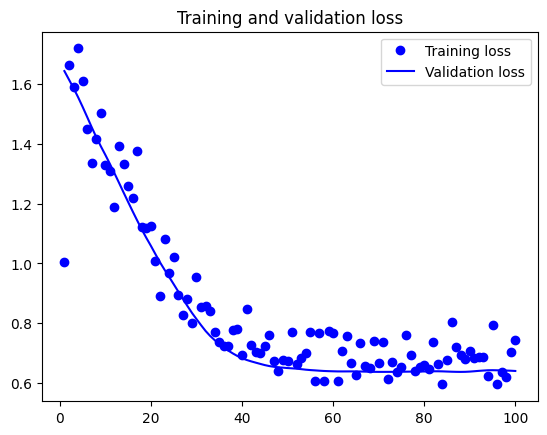

In [5]:
import matplotlib.pyplot as plt

# Plot the training history
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
# Plot predictions against actual values
predictions = model.predict(X_test)

xLabel = range(len(X_test))

print(predictions)
print(y_test)

plt.clf()
plt.title("Comparison of predictions to actual values")
plt.plot(xLabel, y_test, 'r.', label='Actual')
plt.plot(xLabel, predictions, 'b', label='Prediction')
plt.legend()
plt.show()